In [11]:
# IEM 5613
# Case Study 5
# Aishwarya Kulkarni and Shahu Chunade

# 1.> Importing libraries

# To work with DataFrames
import pandas as pd 
# To work with numerical python functions
import numpy as np 
# To work with timeseries
import statsmodels.api as sm 

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore") 

# To plot figures
import matplotlib.pyplot as plt # import matplotlib.pyplot library to plot figures
plt.style.use('fivethirtyeight')

In [12]:
# 2.> Read the data 
df_full = pd.read_csv('airline_passengers.csv', header=0, index_col=0,parse_dates=True)
df= df_full.iloc[84:len(df_full)-3]

In [13]:
# 3.> First five rows of data
df.head()

,Passengers
Date,
2015-01-01,284
2015-02-01,277
2015-03-01,317
2015-04-01,313
2015-05-01,318


In [14]:
# Last five rows of data
df.tail()

,Passengers
Date,
2019-05-01,472
2019-06-01,535
2019-07-01,622
2019-08-01,606
2019-09-01,508


In [15]:
# Data describe
df.describe()

,Passengers
count,57.000000
mean,394.789474
std,82.258030
min,271.000000
25%,337.000000
50%,374.000000
75%,435.000000
max,622.000000


In [16]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2015-01-01 to 2019-09-01
Data columns (total 1 columns):
Passengers    57 non-null int64
dtypes: int64(1)
memory usage: 912.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B49395A88>]],
      dtype=object)

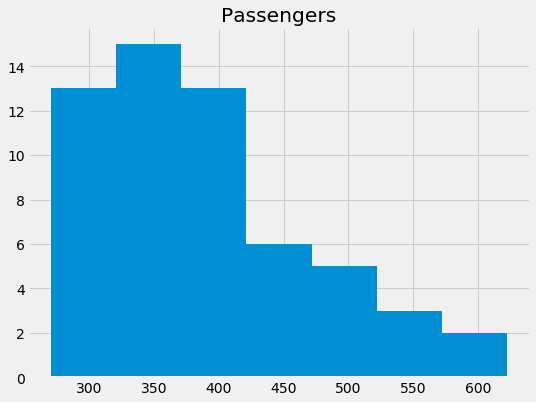

In [17]:
# 4.> Plotting histogram of data
df.hist(bins=7,figsize=(8,6))

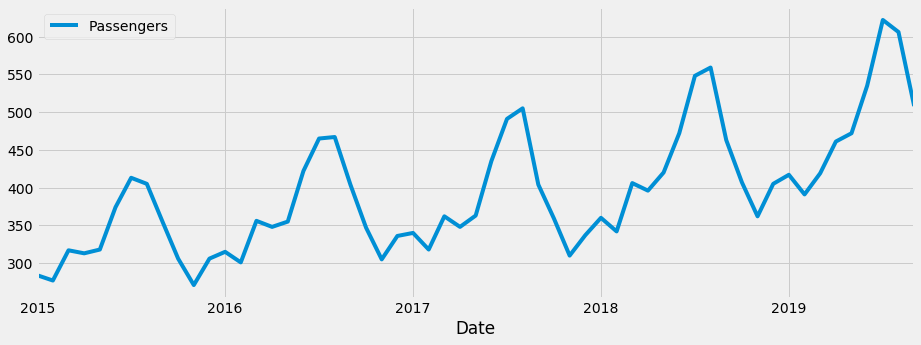

In [18]:
#Vizualization

df.plot(figsize=(14,5))
plt.savefig("airline_passengers_timeseries_plot1.pdf", dpi=600) # this saves the figure as a pdf file
plt.show()

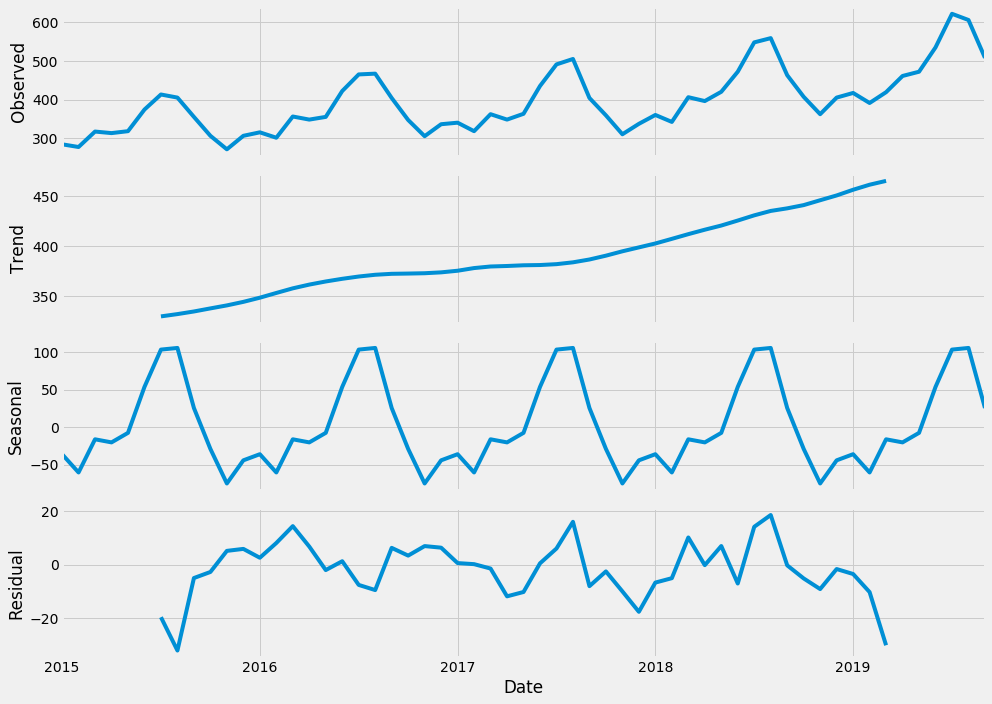

In [19]:
# 5.> Time series decomposition - Additive
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df, model='additive')


from pylab import rcParams 
rcParams['figure.figsize'] = 14, 10

result.plot()

plt.savefig("df_decomposed.pdf", dpi=600)
plt.show() 

In [20]:
# 6.> Moving average (MA) technique
# 6.> a. Applying MA on the past data with window size 2,4 & 8

# create a new dataframe to store the forecast values of MA with different W
df_MA = df.copy() 

# below we create three new columns
df_MA['MA2'] = df.Passengers.rolling(2).mean().shift() 
df_MA['MA4'] = df.Passengers.rolling(4).mean().shift()
df_MA['MA8'] = df.Passengers.rolling(8).mean().shift()

In [21]:
df_MA.head(15)

,Passengers,MA2,MA4,MA8
Date,,,,
2015-01-01,284,NaN,NaN,NaN
2015-02-01,277,NaN,NaN,NaN
2015-03-01,317,280.5,NaN,NaN
2015-04-01,313,297.0,NaN,NaN
2015-05-01,318,315.0,297.75,NaN
2015-06-01,374,315.5,306.25,NaN
2015-07-01,413,346.0,330.50,NaN
2015-08-01,405,393.5,354.50,NaN
2015-09-01,355,409.0,377.50,337.625


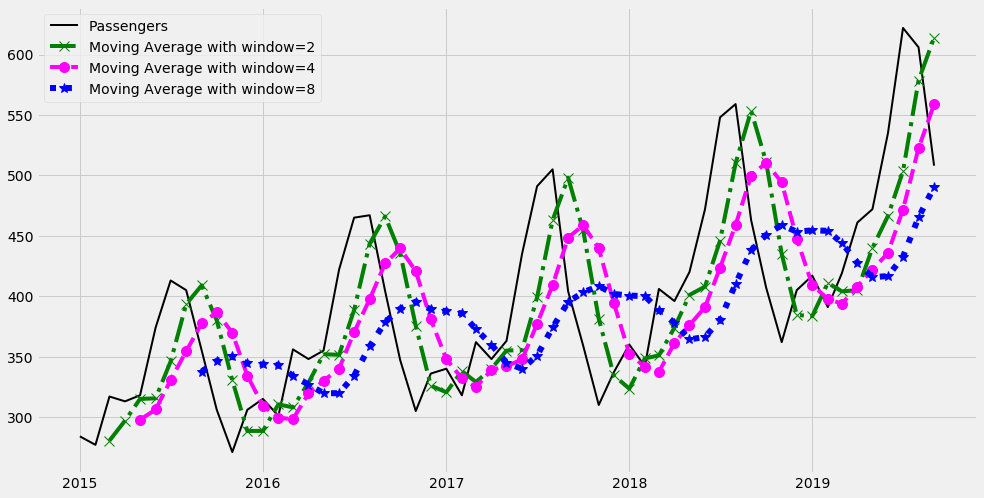

In [22]:
# Visualization

plt.figure(figsize=(15,8))

plt.grid(True)

plt.plot(df_MA['Passengers'],label='Passengers', color='black',linewidth=2)
plt.plot(df_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(df_MA['MA4'],label='Moving Average with window=4',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(df_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', color='blue',
         linewidth=6)

plt.legend(loc=2)
plt.show()

In [23]:
df

,Passengers
Date,
2015-01-01,284
2015-02-01,277
2015-03-01,317
2015-04-01,313
2015-05-01,318
2015-06-01,374
2015-07-01,413
2015-08-01,405
2015-09-01,355


In [24]:
# Seasonality
# 6.> b. Deseasonalization process

df_2018 = df.iloc[-21:-9, :] 
df_2018.rename(columns={"Passengers": "Year 2018"}, inplace=True)
df_2018= df_2018.reset_index(drop=True)

df_2017 = df.iloc[-33:-21, :]
df_2017.rename(columns={"Passengers": "Year 2017"}, inplace=True)
df_2017= df_2017.reset_index(drop=True)

df_2016 = df.iloc[-45:-33, :] 
df_2016.rename(columns={"Passengers": "Year 2016"}, inplace=True)
df_2016= df_2016.reset_index(drop=True)

df_2015 = df.iloc[-57:-45, :] 
df_2015.rename(columns={"Passengers": "Year 2015"}, inplace=True)
df_2015= df_2015.reset_index(drop=True)

In [25]:
# 6b.> i. New Table

d = {"Month":['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
months = pd.DataFrame(data = d)

df_table = pd.concat([months, df_2015["Year 2015"], df_2016["Year 2016"], df_2017["Year 2017"], df_2018["Year 2018"]], 
                     axis=1)
df_table.set_index(["Month"], inplace=True)
df_table

,Year 2015,Year 2016,Year 2017,Year 2018
Month,,,,
Jan,284,315,340,360
Feb,277,301,318,342
Mar,317,356,362,406
Apr,313,348,348,396
May,318,355,363,420
Jun,374,422,435,472
Jul,413,465,491,548
Aug,405,467,505,559
Sep,355,404,404,463


In [26]:
# 6b.> ii. Calculating seasonal index

df_table["average"] = df_table.mean(axis = 1)
average_all = df["Passengers"][-57:-9].mean()
df_table["S Index"] = df_table["average"]/average_all
df_table

,Year 2015,Year 2016,Year 2017,Year 2018,average,S Index
Month,,,,,,
Jan,284,315,340,360,324.75,0.862550
Feb,277,301,318,342,309.50,0.822045
Mar,317,356,362,406,360.25,0.956839
Apr,313,348,348,396,351.25,0.932935
May,318,355,363,420,364.00,0.966799
Jun,374,422,435,472,425.75,1.130810
Jul,413,465,491,548,479.25,1.272908
Aug,405,467,505,559,484.00,1.285525
Sep,355,404,404,463,406.50,1.079681


In [27]:
# 6b.> iii. Validation

print(df_table["S Index"].sum())

12.0


In [28]:
# 6b.> iv. Deseasonalizing data

df_table["deseason 2015"] = df_table["Year 2015"]/df_table["S Index"]
df_table["deseason 2016"] = df_table["Year 2016"]/df_table["S Index"]
df_table["deseason 2017"] = df_table["Year 2017"]/df_table["S Index"]
df_table["deseason 2018"] = df_table["Year 2018"]/df_table["S Index"]

df_table

,Year 2015,Year 2016,Year 2017,Year 2018,average,S Index,deseason 2015,deseason 2016,deseason 2017,deseason 2018
Month,,,,,,,,,,
Jan,284,315,340,360,324.75,0.862550,329.256351,365.196305,394.180139,417.367206
Feb,277,301,318,342,309.50,0.822045,336.964459,366.159935,386.840065,416.035541
Mar,317,356,362,406,360.25,0.956839,331.299098,372.058293,378.328938,424.313671
Apr,313,348,348,396,351.25,0.932935,335.500356,373.016370,373.016370,424.466904
May,318,355,363,420,364.00,0.966799,328.920330,367.190934,375.465659,434.423077
Jun,374,422,435,472,425.75,1.130810,330.736348,373.183793,384.679977,417.399883
Jul,413,465,491,548,479.25,1.272908,324.453834,365.305164,385.730829,430.510172
Aug,405,467,505,559,484.00,1.285525,315.046488,363.275826,392.835744,434.841942
Sep,355,404,404,463,406.50,1.079681,328.800738,374.184502,374.184502,428.830258


In [29]:
# 6b.> v. Decomposing the data into train and test

deseason_df_data = df.iloc[:-9, :].copy()

deseason_df_data.rename(columns={"Passengers": "deseason_Passengers"}, inplace=True)
deseason_df_data["deseason_Passengers"][0:12] = df_table["deseason 2015"]
deseason_df_data["deseason_Passengers"][12:24] = df_table["deseason 2016"]
deseason_df_data["deseason_Passengers"][24:36] = df_table["deseason 2017"]
deseason_df_data["deseason_Passengers"][36:48] = df_table["deseason 2018"]
deseason_df_data

,deseason_Passengers
Date,
2015-01-01,329.256351
2015-02-01,336.964459
2015-03-01,331.299098
2015-04-01,335.500356
2015-05-01,328.920330
2015-06-01,330.736348
2015-07-01,324.453834
2015-08-01,315.046488
2015-09-01,328.800738


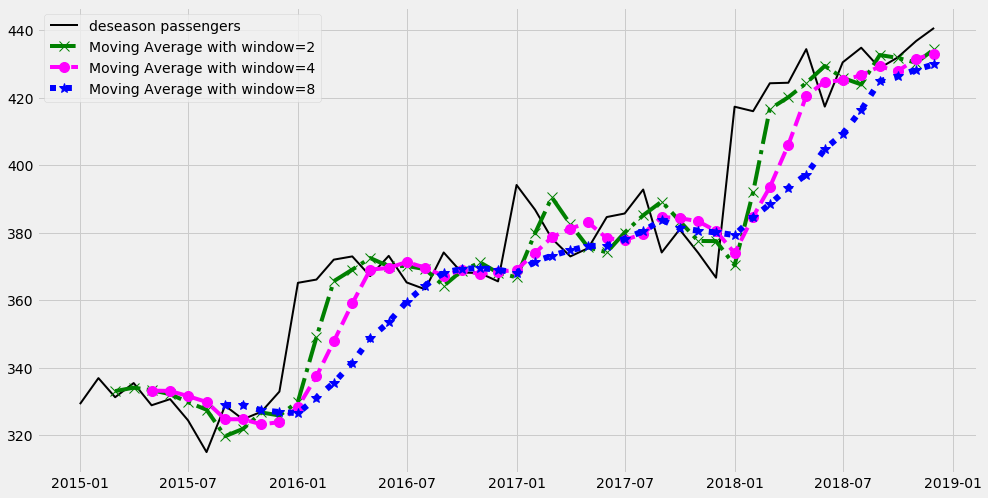

In [30]:
# 6c.> i. Training the model

deseason_df_data_MA = deseason_df_data.copy()
deseason_df_data_MA['MA2'] = deseason_df_data.deseason_Passengers.rolling(2).mean().shift()
deseason_df_data_MA['MA4'] = deseason_df_data.deseason_Passengers.rolling(4).mean().shift()
deseason_df_data_MA['MA8'] = deseason_df_data.deseason_Passengers.rolling(8).mean().shift()

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(deseason_df_data_MA['deseason_Passengers'],label='deseason passengers', color='black',linewidth=2)
plt.plot(deseason_df_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', 
         color='green')
plt.plot(deseason_df_data_MA['MA4'],label='Moving Average with window=4',marker='o', markersize=10, linestyle='dashed', 
         color='magenta')
plt.plot(deseason_df_data_MA['MA8'],label='Moving Average with window=8',marker='*', markersize=10, linestyle='dotted', 
         color='blue',linewidth=6)
plt.legend(loc=2)
plt.show()

In [31]:
# 6c.> ii. Choosing the best model - MA 2
# MAD (mean absolute deviation)

pred = deseason_df_data_MA.iloc[12:]

MAD_MA2 = np.mean(np.absolute(pred['deseason_Passengers'].values - pred['MA2'].values))
MAD_MA4 = np.mean(np.absolute(pred['deseason_Passengers'].values - pred['MA4'].values))
MAD_MA8 = np.mean(np.absolute(pred['deseason_Passengers'].values - pred['MA8'].values))

print("MAD score for Moving average with Window size 2 is {:0.1f}".format(MAD_MA2))
print("MAD score for Moving average with Window size 4 is {:0.1f}".format(MAD_MA4))
print("MAD score for Moving average with Window size 8 is {:0.1f}".format(MAD_MA8))

MAD score for Moving average with Window size 2 is 9.6
MAD score for Moving average with Window size 4 is 11.9
MAD score for Moving average with Window size 8 is 15.6


In [32]:
# 6d.> i. Testing the model

MA2_forecasted_deseason_demand = deseason_df_data["deseason_Passengers"][-5:].mean()

MA2_forecasted_demand = df.iloc[-9:,:]
MA2_forecasted_demand.rename(columns={"Passengers": "Forecasted demand"}, inplace=True)

a = MA2_forecasted_deseason_demand*df_table["S Index"][0:9]
MA2_forecasted_demand["Forecasted demand"] = list(a)


MA2_forecasted_demand 

,Forecasted demand
Date,
2019-01-01,374.892279
2019-02-01,357.287638
2019-03-01,415.873575
2019-04-01,405.483951
2019-05-01,420.202585
2019-06-01,491.486952
2019-07-01,553.247497
2019-08-01,558.730910
2019-09-01,469.264700


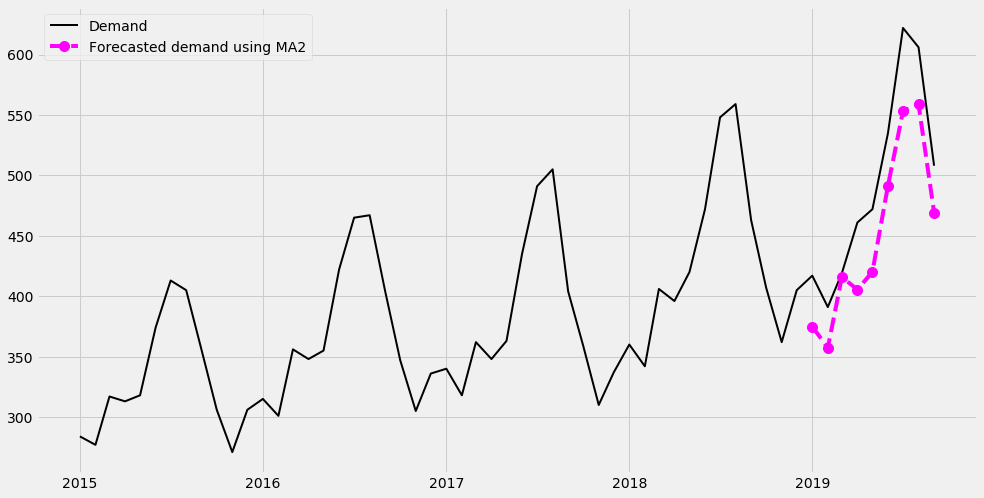

In [33]:
# 6d.> ii. Vizualization

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df['Passengers'],label='Demand', color='black',linewidth=2)
plt.plot(MA2_forecasted_demand["Forecasted demand"],label='Forecasted demand using MA2',marker='o', markersize=10, 
         linestyle='dashed', color='magenta')
plt.legend(loc=2)
plt.show()

In [34]:
# 6d.> iii. MAD score of MA model

MAD_MA2 = np.mean(np.absolute(MA2_forecasted_demand["Forecasted demand"].values - df['Passengers'][-9:].values))
MAD_MA2

42.72554602775496

In [35]:
# 7.> Exponential smoothing (ES) technique
# 7.> a. SimpleExpSmoothing class

from statsmodels.tsa.api import  SimpleExpSmoothing

ES1 = SimpleExpSmoothing(df).fit(smoothing_level=0.05,optimized=False)

ES2 = SimpleExpSmoothing(df).fit(smoothing_level=0.2,optimized=False)

ES3 = SimpleExpSmoothing(df).fit(smoothing_level=0.8,optimized=False)

In [36]:
# 7a.> i. ES forecasts for each value of alpha

dataframe = df.copy()

ES_table = pd.concat([dataframe, ES1.fittedvalues, ES2.fittedvalues,  ES3.fittedvalues], axis=1)

ES_table.rename(columns={0: "ES1"}, inplace=True)
ES_table.rename(columns={1: "ES2"}, inplace=True)
ES_table.rename(columns={2: "ES3"}, inplace=True)

ES_table.head(5)

,Passengers,ES1,ES2,ES3
Date,,,,
2015-01-01,284,284.000000,284.000,284.000
2015-02-01,277,284.000000,284.000,284.000
2015-03-01,317,283.650000,282.600,278.400
2015-04-01,313,285.317500,289.480,309.280
2015-05-01,318,286.701625,294.184,312.256


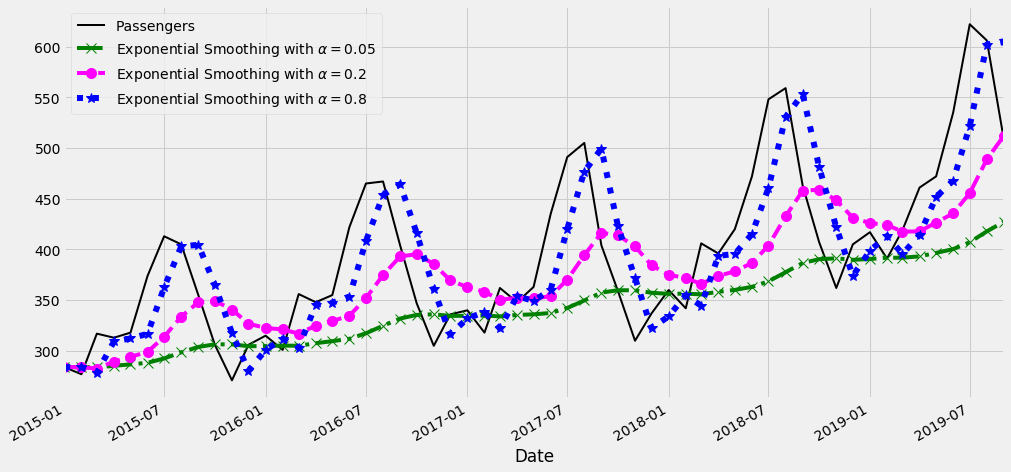

In [37]:
# 7a.> ii. Vizualization

plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df.iloc[-57:,:],label='Passengers', color='black',linewidth=2)


ES1.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.05, marker='x', 
                      markersize=10, linestyle='dashdot', color='green')
ES2.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.2, marker='o', 
                      markersize=10, linestyle='dashed', color='magenta')
ES3.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.8, marker='*', 
                      markersize=10, linestyle='dotted', color='blue',linewidth=6)

plt.legend(loc=2)

plt.show()

In [38]:
# Deseasonalizing data
# Applying the ES method and calculating the forecasts
# Seasonalizing forecasts

df_2018 = df.iloc[-21:-9, :] 
df_2018.rename(columns={"Passengers": "Year 2018"}, inplace=True)
df_2018= df_2018.reset_index(drop=True)

df_2017 = df.iloc[-33:-21, :]
df_2017.rename(columns={"Passengers": "Year 2017"}, inplace=True)
df_2017= df_2017.reset_index(drop=True)

df_2016 = df.iloc[-45:-33, :] 
df_2016.rename(columns={"Passengers": "Year 2016"}, inplace=True)
df_2016= df_2016.reset_index(drop=True)

df_2015 = df.iloc[-57:-45, :] 
df_2015.rename(columns={"Passengers": "Year 2015"}, inplace=True)
df_2015= df_2015.reset_index(drop=True)

d = {"Month":['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
months = pd.DataFrame(data = d)

df_table = pd.concat([months, df_2015["Year 2015"], df_2016["Year 2016"], df_2017["Year 2017"], df_2018["Year 2018"]], 
                     axis=1)
df_table.set_index(["Month"], inplace=True)

df_table["average"] = df_table.mean(axis = 1)
average_all = df["Passengers"][-57:-9].mean()
df_table["S Index"] = df_table["average"]/average_all

df_table["deseason 2015"] = df_table["Year 2015"]/df_table["S Index"]
df_table["deseason 2016"] = df_table["Year 2016"]/df_table["S Index"]
df_table["deseason 2017"] = df_table["Year 2017"]/df_table["S Index"]
df_table["deseason 2018"] = df_table["Year 2018"]/df_table["S Index"]

df_table

,Year 2015,Year 2016,Year 2017,Year 2018,average,S Index,deseason 2015,deseason 2016,deseason 2017,deseason 2018
Month,,,,,,,,,,
Jan,284,315,340,360,324.75,0.862550,329.256351,365.196305,394.180139,417.367206
Feb,277,301,318,342,309.50,0.822045,336.964459,366.159935,386.840065,416.035541
Mar,317,356,362,406,360.25,0.956839,331.299098,372.058293,378.328938,424.313671
Apr,313,348,348,396,351.25,0.932935,335.500356,373.016370,373.016370,424.466904
May,318,355,363,420,364.00,0.966799,328.920330,367.190934,375.465659,434.423077
Jun,374,422,435,472,425.75,1.130810,330.736348,373.183793,384.679977,417.399883
Jul,413,465,491,548,479.25,1.272908,324.453834,365.305164,385.730829,430.510172
Aug,405,467,505,559,484.00,1.285525,315.046488,363.275826,392.835744,434.841942
Sep,355,404,404,463,406.50,1.079681,328.800738,374.184502,374.184502,428.830258


In [39]:
deseason_df_data = df.iloc[:-9, :].copy()

deseason_df_data.rename(columns={"Passengers": "deseason_Passengers"}, inplace=True)
deseason_df_data["deseason_Passengers"][0:12] = df_table["deseason 2015"]
deseason_df_data["deseason_Passengers"][12:24] = df_table["deseason 2016"]
deseason_df_data["deseason_Passengers"][24:36] = df_table["deseason 2017"]
deseason_df_data["deseason_Passengers"][36:48] = df_table["deseason 2018"]

deseason_df_data.head()

,deseason_Passengers
Date,
2015-01-01,329.256351
2015-02-01,336.964459
2015-03-01,331.299098
2015-04-01,335.500356
2015-05-01,328.920330


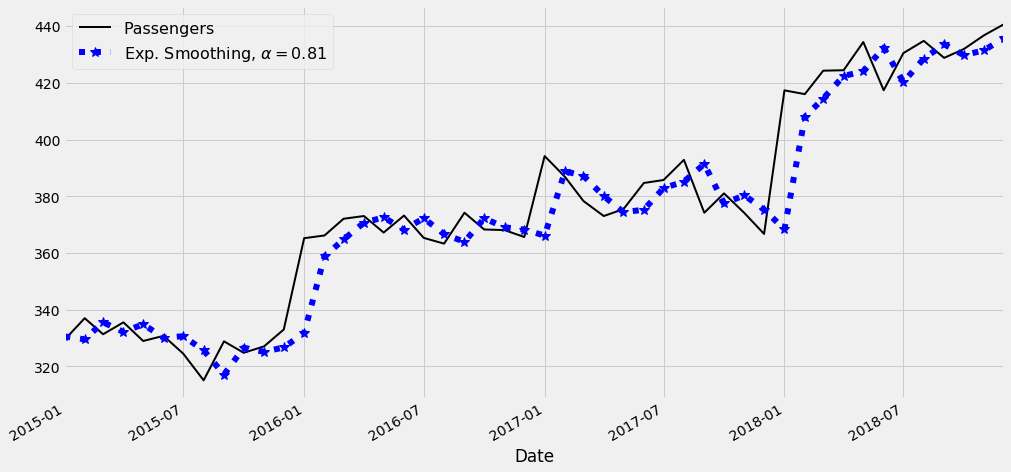

In [40]:
# 7b.> i. & ii. Training the ES model

plt.figure(figsize=(15,8))
plt.grid(True)

from statsmodels.tsa.api import  SimpleExpSmoothing

plt.plot(deseason_df_data,label='Passengers', color='black',linewidth=2)

ES_best = SimpleExpSmoothing(deseason_df_data).fit() 

best_alpha = ES_best.model.params['smoothing_level']

ES_best.fittedvalues.plot(label=r'Exp. Smoothing, $\alpha=${:0.2f}'.format(best_alpha), 
                          marker='*', markersize=10, linestyle='dotted', 
                          color='blue',linewidth=6)

plt.legend(loc=2,prop={'size': 16})
plt.show()

In [41]:
# 7c.> i. Testing the model

ES_forecasted_demand = df.iloc[-9:,:]
ES_forecasted_demand.rename(columns={"Passengers": "Forecasted demand"}, inplace=True)


ES_forecasted_deseason_demand = ES_best.forecast()

b = ES_forecasted_deseason_demand.values[0]*df_table["S Index"][0:9]
ES_forecasted_demand["Forecasted demand"] = list(b)

ES_forecasted_demand 

,Forecasted demand
Date,
2019-01-01,379.320016
2019-02-01,361.507451
2019-03-01,420.785329
2019-04-01,410.272996
2019-05-01,425.165468
2019-06-01,497.291753
2019-07-01,559.781732
2019-08-01,565.329908
2019-09-01,474.807040


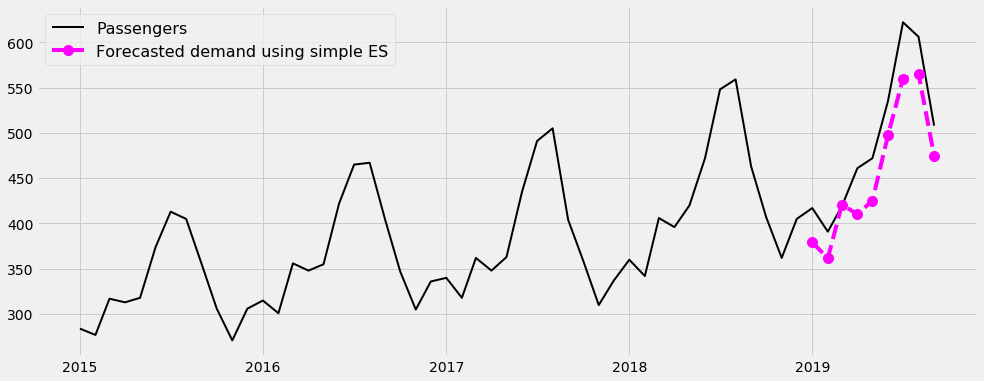

In [42]:
# 7c.> ii. Vizualization

plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(df['Passengers'],label='Passengers', color='black',linewidth=2)
plt.plot(ES_forecasted_demand["Forecasted demand"],label='Forecasted demand using simple ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')

plt.legend(loc=2,prop={'size': 16})
plt.show()

In [43]:
# 7c.> iii. MAD score of the simple ES model

MAD_ES = np.mean(np.absolute(ES_forecasted_demand["Forecasted demand"].values 
                             - df['Passengers'][-9:].values))
round(MAD_ES,2)

37.81

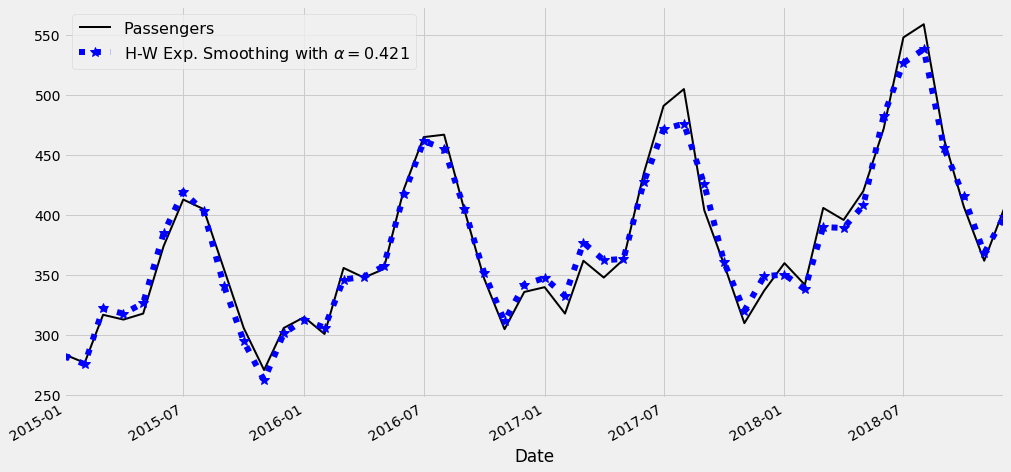

In [44]:
# 8.> Holt-Winters Exponential Smoothing method
# 8.> a. Training the model

plt.figure(figsize=(15,8))
plt.grid(True)

train_data = df.iloc[-57:-9,:]
plt.plot(train_data ,label='Passengers', color='black',linewidth=2)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

H_W_model = ExponentialSmoothing(train_data.astype(np.float), trend="add", seasonal="add",
                                 seasonal_periods=12)

H_W_fit = H_W_model.fit()

best_H_W_alpha = H_W_fit.model.params['smoothing_level']

H_W_fit.fittedvalues.plot(label=r'H-W Exp. Smoothing with $\alpha=%0.3f$'%best_H_W_alpha,
                          marker='*', markersize=10, linestyle='dotted', 
                          color='blue',linewidth=6)

plt.legend(loc=2,prop={'size': 16})
plt.show()

In [45]:
# 8b.> i. Testing the model

HES_forecasted_demand = df.iloc[-9:,:]
HES_forecasted_demand.rename(columns={"Passengers": "Forecasted demand"}, inplace=True)

HES_forecasted_demand["Forecasted demand"] = H_W_fit.forecast(9)

HES_forecasted_demand 

,Forecasted demand
Date,
2019-01-01,421.579290
2019-02-01,403.105352
2019-03-01,461.449769
2019-04-01,449.393108
2019-05-01,469.030498
2019-06-01,526.081214
2019-07-01,593.770589
2019-08-01,596.330476
2019-09-01,497.193977


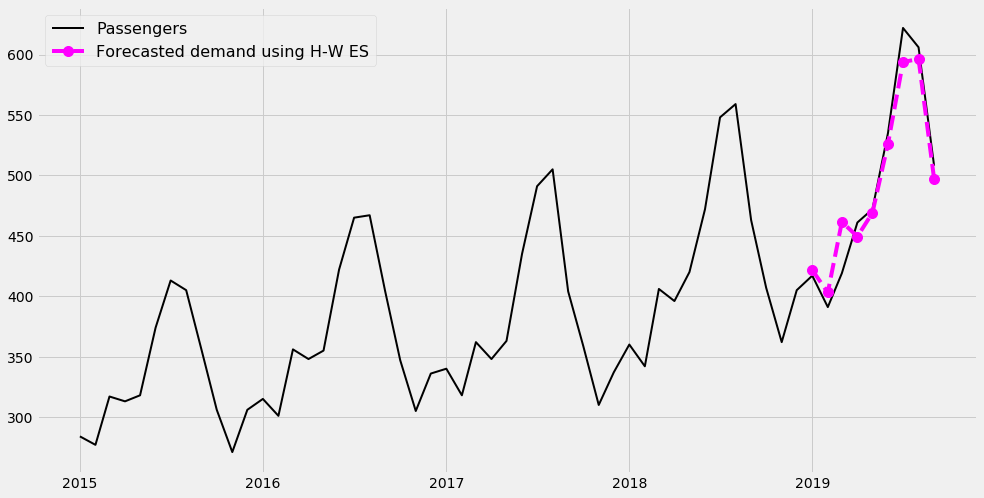

In [46]:
# 8b.> ii. Vizualization

plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df['Passengers'], label='Passengers', color='black',linewidth=2)
plt.plot(HES_forecasted_demand["Forecasted demand"],label='Forecasted demand using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

In [47]:
# 8b.> iii. MAD score of the Holt Winters ES model

MAD_HES = np.mean(np.absolute(HES_forecasted_demand["Forecasted demand"].values
                              - df['Passengers'][-9:].values))
round(MAD_HES,2)

14.59

In [48]:
# 9.> a. Forecasting the future demand using the best model - Holt Winters ES model

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 9.> b. Training the model
train_final = df.iloc[-57:,:]
model_final = ExponentialSmoothing(train_final.astype(np.float), trend="add", seasonal="add",
                                   seasonal_periods=12)

# 9.> c. Forecasting for Oct, Nov, Dec 2019
fit_final = model_final.fit()
round(fit_final.forecast(3),1)

2019-10-01    453.9
2019-11-01    409.1
2019-12-01    449.3
Freq: MS, dtype: float64